![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 3. Modelamiento

Una vez preparados los datos, se procederá con el modelamiento. Recuerden que el objetivo es clasificar a un paciente como hospitalizado o no hospitalizado, teniendo en cuenta un data set que contiene información referente a antecedentes del paciente, morbilidad asociada al paciente y antecedentes relacionados con la toma de la biopsia y complicaciones infecciosas.




Carguen la base de datos preparada desde la fase 2.

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, tree
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate, train_test_split, StratifiedKFold, cross_val_score
from IPython.display import clear_output
from sklearn.ensemble import RandomForestClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report


In [5]:
df = pd.read_csv(r'C:\Users\paula\OneDrive\Curso\Henry\M6\Proyecto_Integrador\Propuesta 1\BBDD_Hospitalización_ETL.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 16 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Unnamed: 0                                                                 566 non-null    int64  
 1   EDAD                                                                       566 non-null    int64  
 2   DIABETES                                                                   566 non-null    int64  
 3   HOSPITALIZACIÓN ULTIMO MES                                                 566 non-null    int64  
 4   PSA                                                                        566 non-null    float64
 5   BIOPSIAS PREVIAS                                                           566 non-null    int64  
 6   VOLUMEN PROSTATICO                                        

In [7]:
df.columns.to_list()

['Unnamed: 0',
 'EDAD',
 'DIABETES',
 'HOSPITALIZACIÓN ULTIMO MES',
 'PSA',
 'BIOPSIAS PREVIAS',
 'VOLUMEN PROSTATICO',
 'NUMERO DE MUESTRAS TOMADAS',
 'CUP',
 'BIOPSIA',
 'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA',
 'FIEBRE',
 'ITU',
 'PATRON DE RESISTENCIA',
 'HOSPITALIZACION',
 'ANTIBIOTICO UTILIZADO EN LA PROFILAXIS']

Separen el dataset en X, y (variable objetivo)

In [8]:
X = df[[ 'EDAD',
 'DIABETES',
 'HOSPITALIZACIÓN ULTIMO MES',
 'PSA',
 'BIOPSIAS PREVIAS',
 'VOLUMEN PROSTATICO',
 'NUMERO DE MUESTRAS TOMADAS',
 'CUP',
 'BIOPSIA',
 'FIEBRE',
 'ITU',
 'PATRON DE RESISTENCIA',
 'ANTIBIOTICO UTILIZADO EN LA PROFILAXIS']]
y = df['HOSPITALIZACION']



Separen el dataset en X_train, X_test, y_train y y_test

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.4,random_state =250)

Instancien, entrenen y predigan sobre un árbol de decisión asignando una profundidad máxima arbitraria

In [10]:
from sklearn.tree import DecisionTreeClassifier # Importar la clase DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0,max_depth=80) # Crear un clasificador de árbol de decisión con criterio de entropía. 
classifier.fit(X_train, y_train) # Entrene el modelo de clasificación de árbol de decisión en el conjunto de entrenamiento.

DecisionTreeClassifier(criterion='entropy', max_depth=80, random_state=0)

In [11]:
y_pred = classifier.predict(X_test) # predicciones de los datos de prueba X_test con el modelo entrenado
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)) # concatenamos los vectores y_pred y y_test en un solo vector para compararlos

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[218   2]
 [  0   7]]


0.9911894273127754

In [13]:
tree_train_scores_mean = []
tree_train_scores_std = []
tree_test_scores_mean = []
tree_test_scores_std = []

profundidades = np.arange(1,20,1)
i = 0
i_max = len(profundidades)
for profundidad in profundidades:
    i = i + 1
    clf = DecisionTreeClassifier(max_depth=profundidad)
    tree_scores = cross_validate(clf, X, y, cv=5, return_train_score=True, n_jobs = -1)
    
    tree_train_scores_mean.append(tree_scores['train_score'].mean())
    tree_train_scores_std.append(tree_scores['train_score'].std())
    
    tree_test_scores_mean.append(tree_scores['test_score'].mean())
    tree_test_scores_std.append(tree_scores['test_score'].std())
    
    clear_output(wait=True)
    print('Completado: ' + str(round(i / i_max * 100, 2)) + '%')

tree_train_scores_mean = np.array(tree_train_scores_mean)
tree_train_scores_std = np.array(tree_train_scores_std)
tree_test_scores_mean = np.array(tree_test_scores_mean)
tree_test_scores_std = np.array(tree_test_scores_std)


Completado: 100.0%


In [14]:
print('tree_train_scores_mean es =',tree_train_scores_mean)
print('tree_train_scores_std es =',tree_train_scores_std)
print('tree_test_scores_mean es =',tree_test_scores_mean)
print('tree_test_scores_std es =',tree_test_scores_std)

tree_train_scores_mean es = [0.96643029 0.98807556 0.99602454 0.99823302 0.99911602 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.        ]
tree_train_scores_std es = [0.00380532 0.00264446 0.00088399 0.00088349 0.00108265 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
tree_test_scores_mean es = [0.96641826 0.98237851 0.97883869 0.97883869 0.97705325 0.97705325
 0.97705325 0.97705325 0.97529887 0.97883869 0.97529887 0.97883869
 0.97705325 0.97529887 0.98059308 0.97705325 0.97705325 0.97883869
 0.97883869]
tree_test_scores_std es = [0.01524728 0.01570061 0.01311018 0.01311018 0.00894001 0.00894001
 0.00894001 0.00894001 0.01161186 0.01311018 0.01161186 0.01311018
 0.00894001 0.01161186 0.01022472 0.00894001 0.00894001 0.01311018
 0.01311018]


Realicen la matriz de confusión para este modelo. Se recomienda utilizar mapa de calor para la visualización. 

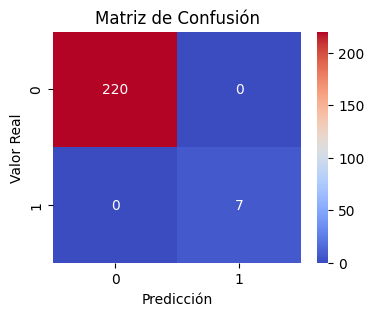

In [15]:
# Paso 1: Ajustar el modelo con los datos de entrenamiento
clf = DecisionTreeClassifier(max_depth=80)  # Cambia max_depth según lo necesario
clf.fit(X_train, y_train)

# Paso 2: Realizar predicciones sobre el set de prueba
y_pred = clf.predict(X_test)

# Paso 3: Calcular la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)

# Paso 4: Visualizar la matriz de confusión como un mapa de calor
plt.figure(figsize=(4, 3))
sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="coolwarm", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión")
plt.show()


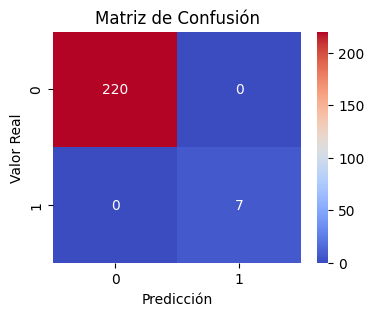

In [16]:
# Paso 3: Calcular la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)

# Paso 4: Visualizar la matriz de confusión como un mapa de calor
plt.figure(figsize=(4, 3))
sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="coolwarm", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión")
plt.show()


Seleccione tres métricas de evaluación para este modelo de clasificación y describa el significado de cada una de ellas para el modelo creado.

### **`Exactitud`**

In [17]:
accuracy_score(y_pred,y_test)

1.0

### **`Precisión`**

In [18]:
from sklearn.metrics import precision_score

precision = precision_score(y_pred, y_test, average='macro')
print(round(precision,2))

1.0


### **`Exhaustividad/Recall/Sensibilidad`**

In [19]:
from sklearn.metrics import recall_score

#precision = recall_score(y_test, y_test_pred, average= None)
recall = recall_score(y_pred, y_test, average='weighted')
print(round(recall,2))

1.0


### **`F1-Score`**

In [20]:
from sklearn.metrics import f1_score

f1_score = f1_score(y_pred, y_test, average= 'macro')
print(round(precision,2))

1.0


In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       220
           1       1.00      1.00      1.00         7

    accuracy                           1.00       227
   macro avg       1.00      1.00      1.00       227
weighted avg       1.00      1.00      1.00       227



Realice un diagrama de la importancia de cada variable respecto a la clasificación de la variable objetivo

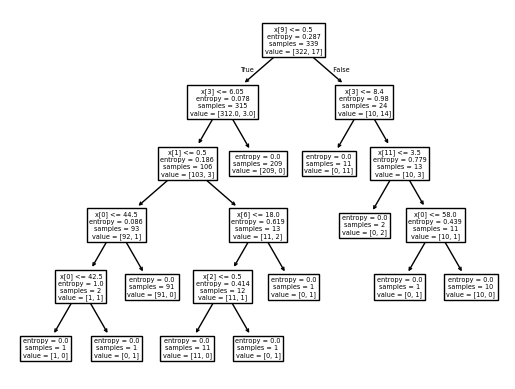

In [22]:
tree.plot_tree(classifier.fit(X_train,y_train))
plt.show()

In [23]:
from sklearn.tree import export_text

# Exportar las reglas del árbol
tree_rules = export_text(classifier, feature_names=list(X_train.columns))
print(tree_rules)


|--- FIEBRE <= 0.50
|   |--- PSA <= 6.05
|   |   |--- DIABETES <= 0.50
|   |   |   |--- EDAD <= 44.50
|   |   |   |   |--- EDAD <= 42.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- EDAD >  42.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- EDAD >  44.50
|   |   |   |   |--- class: 0
|   |   |--- DIABETES >  0.50
|   |   |   |--- NUMERO DE MUESTRAS TOMADAS <= 18.00
|   |   |   |   |--- HOSPITALIZACIÓN ULTIMO MES <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- HOSPITALIZACIÓN ULTIMO MES >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- NUMERO DE MUESTRAS TOMADAS >  18.00
|   |   |   |   |--- class: 1
|   |--- PSA >  6.05
|   |   |--- class: 0
|--- FIEBRE >  0.50
|   |--- PSA <= 8.40
|   |   |--- class: 1
|   |--- PSA >  8.40
|   |   |--- PATRON DE RESISTENCIA <= 3.50
|   |   |   |--- class: 1
|   |   |--- PATRON DE RESISTENCIA >  3.50
|   |   |   |--- EDAD <= 58.00
|   |   |   |   |--- class: 1
|   |   |   |--- EDAD >  58.00
|   |   |   |   |--- c

In [24]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None, predictions=True,random_state=123)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

models

100%|██████████| 31/31 [00:00<00:00, 31.68it/s]

[LightGBM] [Info] Number of positive: 18, number of negative: 378
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000118 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 148
[LightGBM] [Info] Number of data points in the train set: 396, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.045455 -> initscore=-3.044522
[LightGBM] [Info] Start training from score -3.044522
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearSVC,0.98,0.83,0.83,0.98,0.00
DecisionTreeClassifier,0.98,0.83,0.83,0.98,0.00
BaggingClassifier,0.98,0.83,0.83,0.98,0.04
LogisticRegression,0.97,0.82,0.82,0.97,0.02
SVC,0.97,0.82,0.82,0.97,0.03
SGDClassifier,0.96,0.82,0.82,0.97,0.00
Perceptron,0.96,0.82,0.82,0.97,0.02
PassiveAggressiveClassifier,0.96,0.82,0.82,0.96,0.01
RidgeClassifierCV,0.95,0.82,0.82,0.96,0.02


In [25]:
clf = DecisionTreeClassifier(random_state=123)

cv = StratifiedKFold(n_splits=500, shuffle=True, random_state=123)
scores = cross_val_score(clf, X, y, cv=cv)

#imprimir los scores y la media
print("Valores obtenidos: ", scores)
print("Media:", scores.mean())
print("Número de CV usados: ", len(scores))

Valores obtenidos:  [1.  1.  1.  1.  1.  1.  0.5 1.  0.5 0.5 1.  1.  1.  1.  1.  0.5 1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.5 1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. 

In [26]:
# Crear el modelo con balanceo automático
rf = RandomForestClassifier(class_weight='balanced', random_state=123)

# Entrenar el modelo
rf.fit(X_train, y_train)

# Predicciones
y_pred = rf.predict(X_test)

# Evaluar el modelo
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       164
           1       1.00      0.50      0.67         6

    accuracy                           0.98       170
   macro avg       0.99      0.75      0.83       170
weighted avg       0.98      0.98      0.98       170



Encuentre cuál sería un valor óptimo para el hiperparámetro **max_depth** para el árbol de decisión. Construya un modelo con este valor y compare las métricas de evaluación respecto al modelo creado con una profundidad arbitraria. 

Instancien, entrenen y predigan sobre un modelo de k-vecinos asignando una cantidad de vecinos k-aribitraria. 

In [27]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2) # p es el parámetro de la distancia de Minkowski 
                                                                                #(p = 2 es la distancia euclidiana, p=1 es la distancia de Manhattan)
                                                                                #metric = 'minkowski' es la distancia de Minkowski
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [29]:
cm = confusion_matrix(y_test, y_pred) # y_test es el valor real, y_pred es el valor predicho
print(cm) # matriz de confusión
accuracy_score(y_test, y_pred) # porcentaje de acierto

[[164   0]
 [  3   3]]


0.9823529411764705

In [32]:
# Reescalar los datos para las dos columnas seleccionadas
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)

# Crear la malla para graficar
X1, X2 = np.meshgrid(np.arange(start=X_train_scaled[:, 0].min() - 1, stop=X_train_scaled[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_train_scaled[:, 1].min() - 1, stop=X_train_scaled[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Graficar los puntos de datos
for i, j in enumerate(np.unique(y_train)):
    plt.scatter(X_train_scaled[y_train == j, 0], X_train_scaled[y_train == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('K-NN (Training set)')
plt.xlabel('EDAD')
plt.ylabel('PSA')
plt.legend()
plt.show()


ValueError: X has 2 features, but StandardScaler is expecting 13 features as input.

In [26]:
X_set, y_set = sc.inverse_transform(X_train), y_train
X1= np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1)) # crea una malla de puntos para graficar el resultado del modelo de clasificacion
#plt.contourf(X1, classifier.predict(sc.transform(np.array([X1.ravel()]).T)).reshape(X1.shape),
#             alpha = 0.75, cmap = ListedColormap(('red', 'green'))) # grafica la malla de puntos y la clasificacion de cada punto de la malla en base al modelo de clasificacion entrenado (classifier)
# plt.xlim(X1.min(), X1.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],  label = j) # grafica los puntos de entrenamiento (X_set) con su clasificacion (y_set) en base a la leyenda de colores (red, green)
plt.title('K-NN (Training set)')
plt.xlabel('Dias postbiopsia')
plt.ylabel('Patron de resistencia')
plt.legend()
plt.show()

IndexError: index 1 is out of bounds for axis 1 with size 1

Encuentre el valor óptimo para k

Halle las mismas tres métricas de evaluación para este modelo de clasificación y compare los valores para el performance, respecto al árbol de decisión cuyo hiperparámetro **max_depth** se optimizó. ¿Qué puede concluir? 

### **`Exactitud`**

In [59]:
accuracy_score(y_pred,y_test)

1.0

De acuerdo con lo aprendido en el módulo, ¿Cómo cree que se puede mejorar el performance de este modelo? 

R/